In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston_1 = load_boston()
#bos = pd.DataFrame(boston.data)
print(dir(boston_1))

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [3]:
print(boston_1.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston = pd.DataFrame(boston_1.data, columns=boston_1.feature_names)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
info={'CRIM' :    'per capita crime rate by town',
        'ZN' :      'proportion of residential land zoned for lots over 25,000 sq.ft',
        'INDUS'    :'proportion of non-retail business acres per town',            
        'CHAS'     :'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
         'NOX'      :'nitric oxides concentration (parts per 10 million)',
         'RM'      : 'average number of rooms per dwelling',
        'AGE'     :'proportion of owner-occupied units built prior to 1940',
        'DIS'      :'weighted distances to five Boston employment centres',
        'RAD'      :'index of accessibility to radial highways',
         'TAX'      :'full-value property-tax rate per $10,000',
         'PTRATIO'  :'pupil-teacher ratio by town',
         'B'        :'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
         'LSTAT'    :'% lower status of the population',
         'MEDV'     :'Median value of owner-occupied homes in $1000s'}

In [6]:
info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per $10,000',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'MEDV': 'Median value of owner-occupied homes in $1000s'}

In [7]:
boston['MEDV'] = boston_1.target

In [8]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


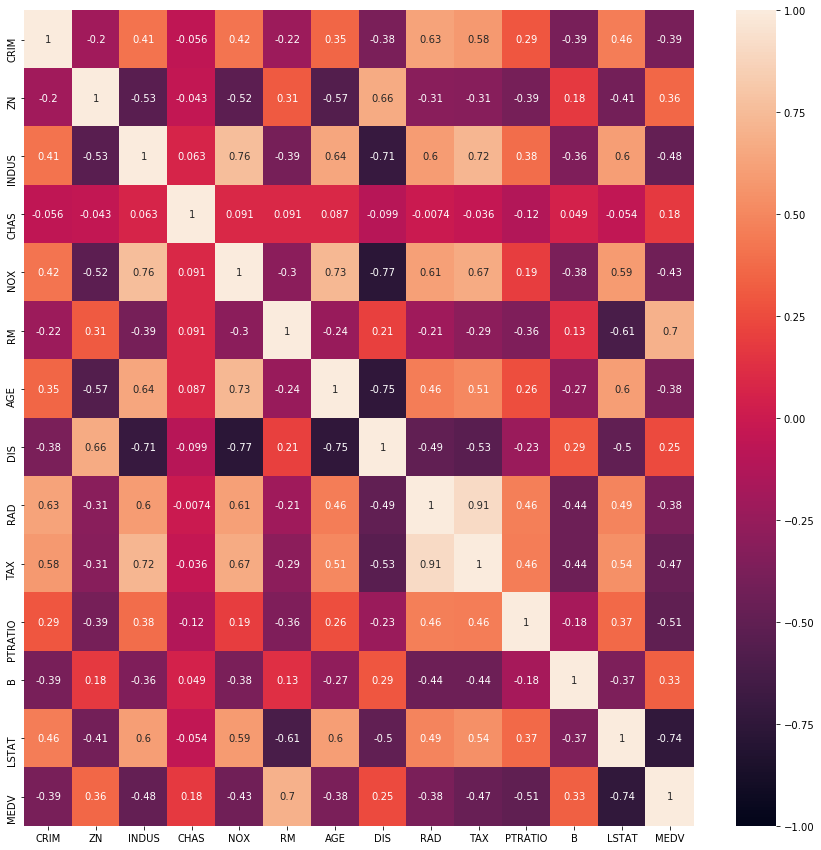

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr(),annot=True,vmin=-1,vmax=1)

In [10]:
info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per $10,000',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'MEDV': 'Median value of owner-occupied homes in $1000s'}

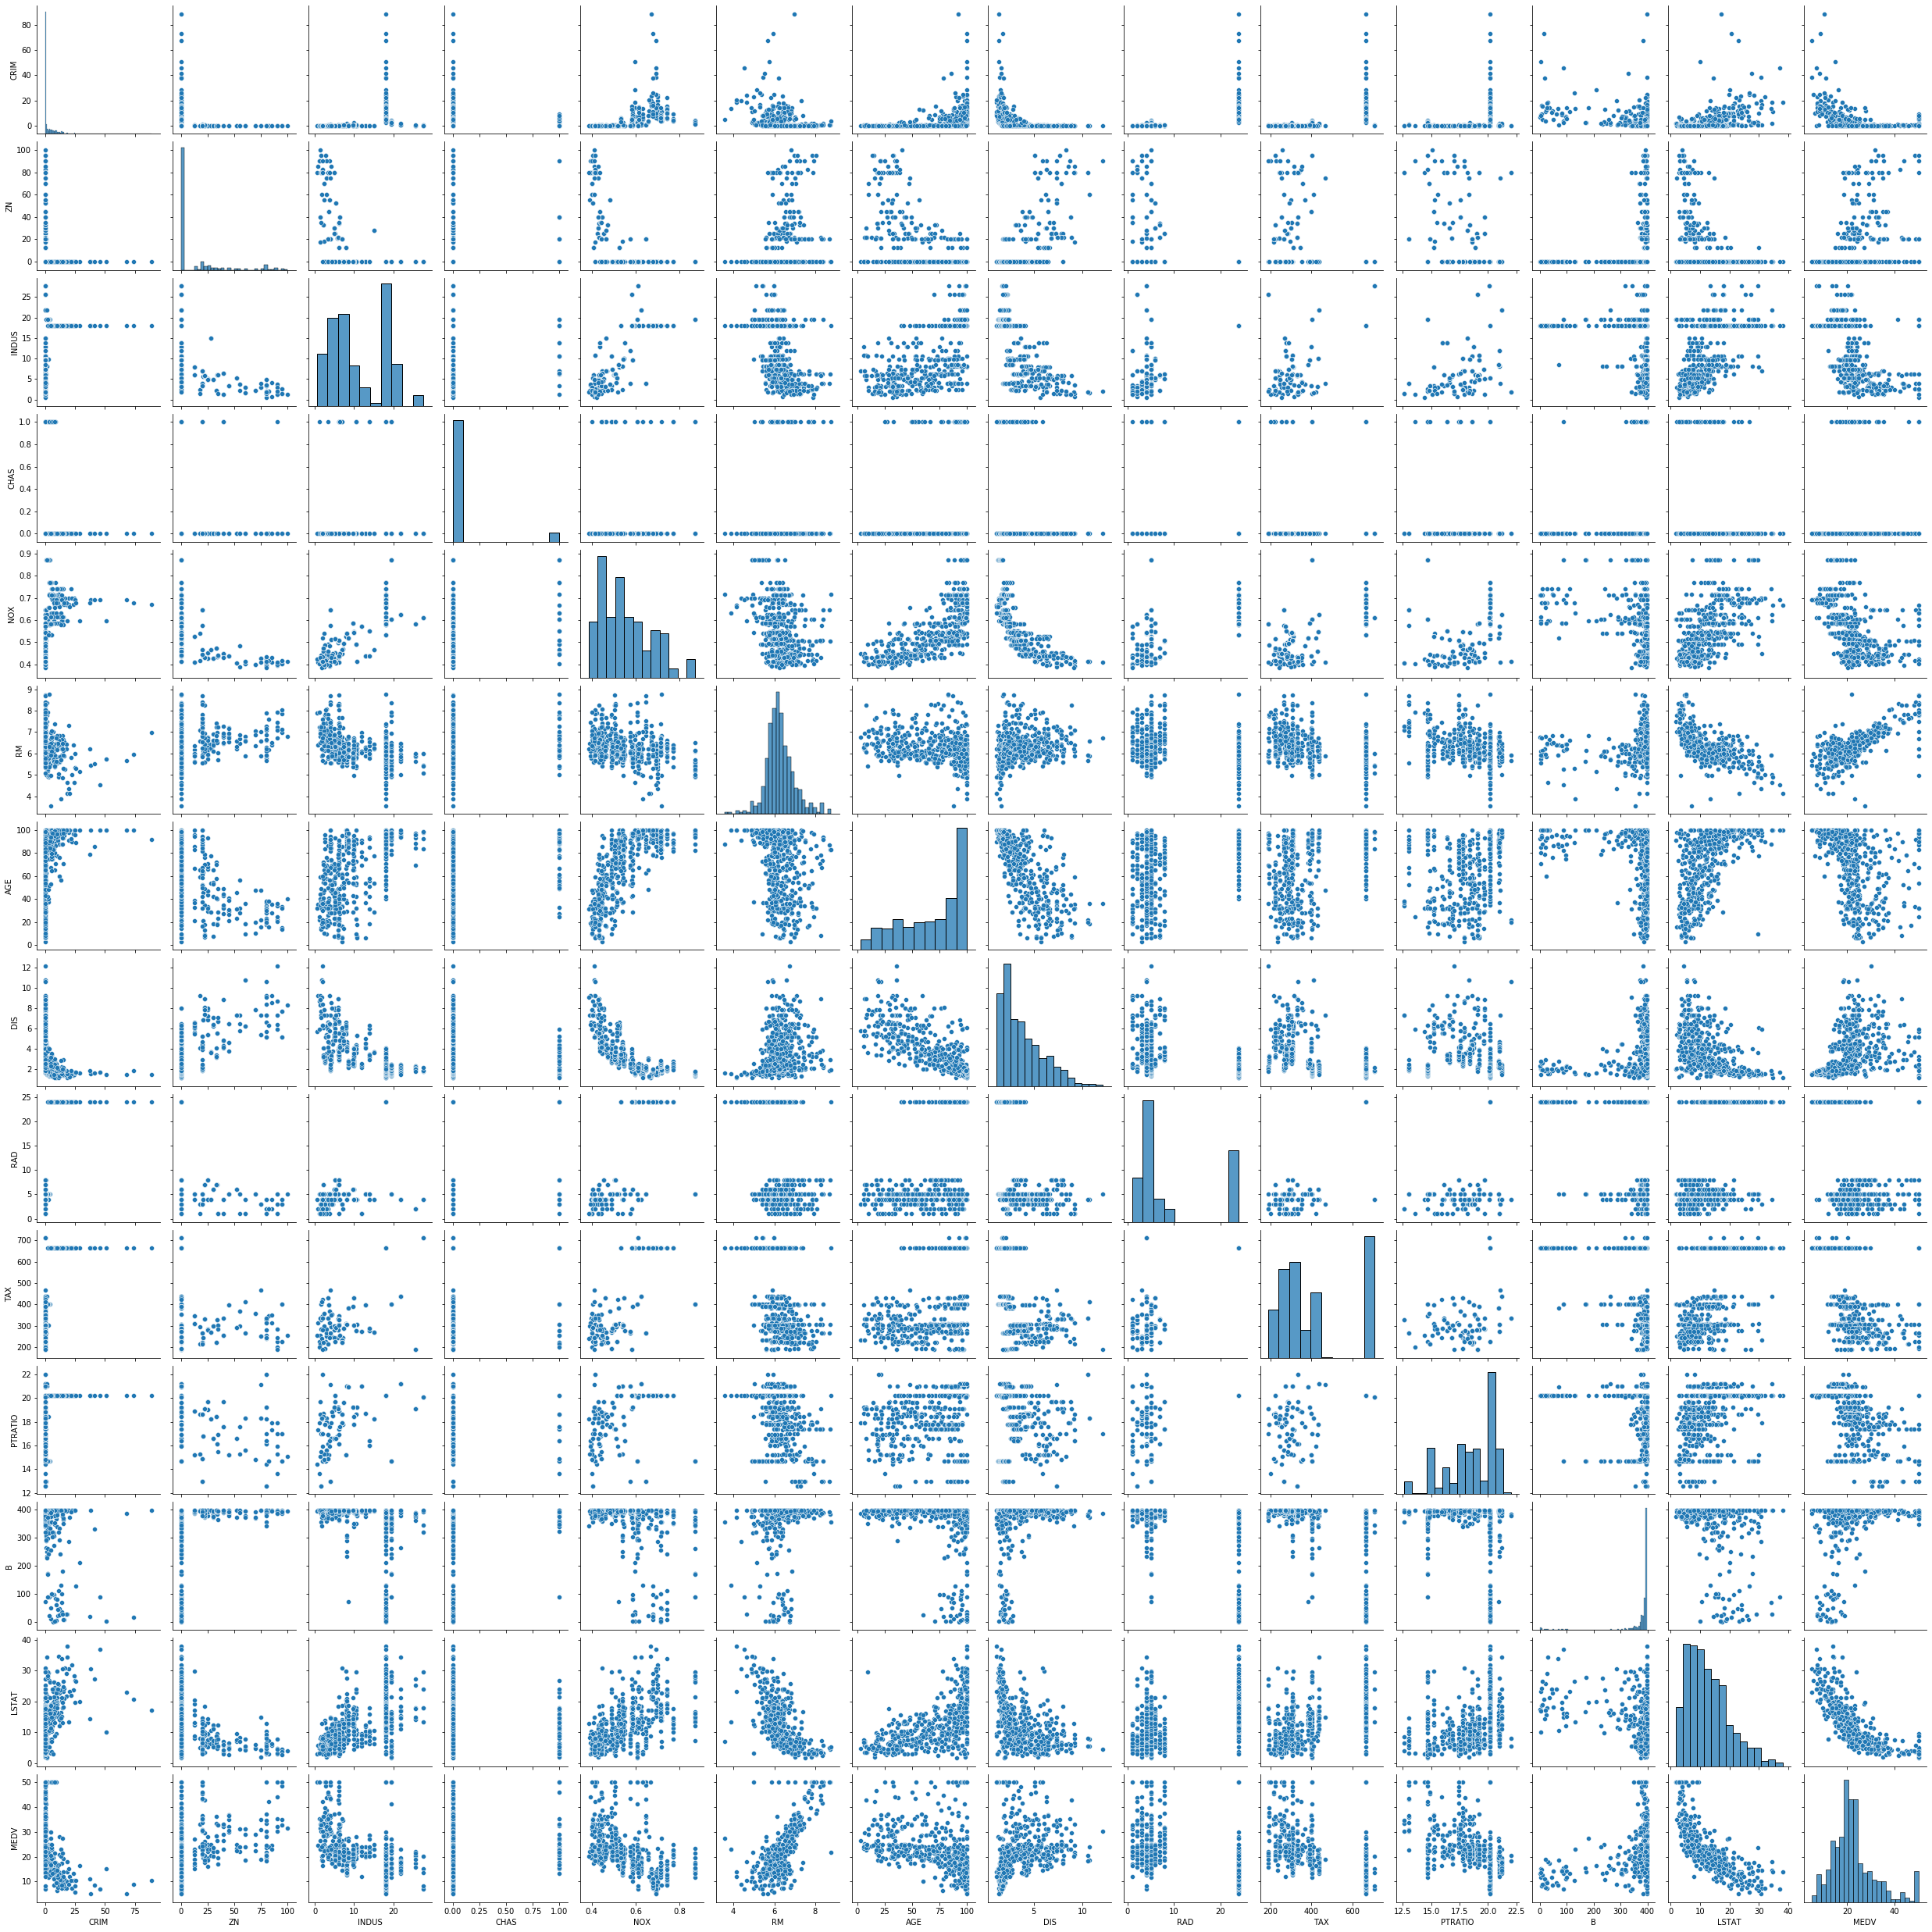

In [11]:
sns.pairplot(data=boston)

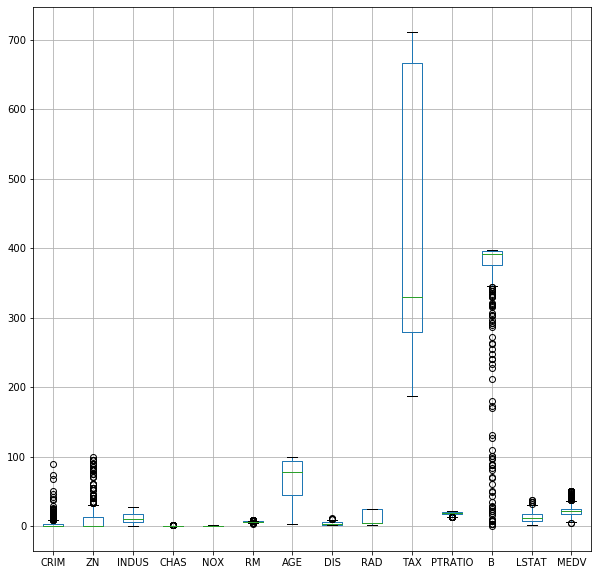

In [12]:
plt.figure(figsize=(10,10))
boston.boxplot()

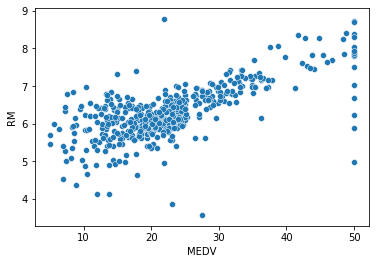

In [13]:
sns.scatterplot(y='RM',x='MEDV',data=boston)

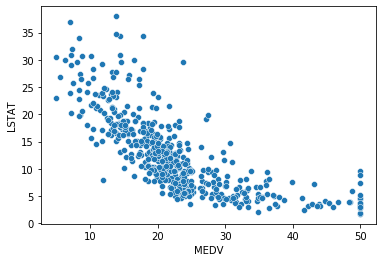

In [14]:
sns.scatterplot(y='LSTAT',x='MEDV',data=boston)

In [15]:
info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per $10,000',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'MEDV': 'Median value of owner-occupied homes in $1000s'}

In [16]:
final_boston_stat=boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [17]:
final_boston=boston[['RM','LSTAT','INDUS','NOX','TAX','PTRATIO','MEDV']]

In [18]:
final_boston

,RM,LSTAT,INDUS,NOX,TAX,PTRATIO,MEDV
0,6.575,4.98,2.31,0.538,296.0,15.3,24.0
1,6.421,9.14,7.07,0.469,242.0,17.8,21.6
2,7.185,4.03,7.07,0.469,242.0,17.8,34.7
3,6.998,2.94,2.18,0.458,222.0,18.7,33.4
4,7.147,5.33,2.18,0.458,222.0,18.7,36.2
...,...,...,...,...,...,...,...
501,6.593,9.67,11.93,0.573,273.0,21.0,22.4
502,6.120,9.08,11.93,0.573,273.0,21.0,20.6
503,6.976,5.64,11.93,0.573,273.0,21.0,23.9
504,6.794,6.48,11.93,0.573,273.0,21.0,22.0


In [19]:
y=final_boston['MEDV']
x=final_boston.drop(columns='MEDV')

In [20]:
x

,RM,LSTAT,INDUS,NOX,TAX,PTRATIO
0,6.575,4.98,2.31,0.538,296.0,15.3
1,6.421,9.14,7.07,0.469,242.0,17.8
2,7.185,4.03,7.07,0.469,242.0,17.8
3,6.998,2.94,2.18,0.458,222.0,18.7
4,7.147,5.33,2.18,0.458,222.0,18.7
...,...,...,...,...,...,...
501,6.593,9.67,11.93,0.573,273.0,21.0
502,6.120,9.08,11.93,0.573,273.0,21.0
503,6.976,5.64,11.93,0.573,273.0,21.0
504,6.794,6.48,11.93,0.573,273.0,21.0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)

In [22]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
reg.score(x_train,y_train)

0.6579810404467761

In [24]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1679.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:06:05   Log-Likelihood:                         -1561.0
No. Observations:                 506   AIC:                                      3134.
Df Residuals:                     500   BIC:                                      3159.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [26]:
y_stat=final_boston_stat['MEDV']
x_stat=final_boston_stat.drop(columns='MEDV')

In [27]:
import statsmodels.api as sm
model_total=sm.OLS(endog=y_stat,exog=x_stat).fit()
print(model_total.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:06:06   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------